In [196]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [155]:
def getWinners(round):
    games = round.findChildren('div', recursive=False)
    
    seeds = []
    for game in games:
        teams = game.findChildren('div', recursive=False)
        for team in teams:
            seeds.append(int(team.find('span').string))
    return seeds

In [156]:
def getRound2Seeds(year):
    pageaddress = "https://www.sports-reference.com/cbb/postseason/{}-ncaa.html".format(year)
    soup = BeautifulSoup(urlopen(pageaddress), "html.parser")
    bracketDiv = soup.find_all('div', {'id': 'brackets'})[0]
    print('Finding teams from {}'.format(year))
       
    allWinners = []
    for region in range(4):
        bracket = bracketDiv.findChildren('div',recursive=False)[region].find_all('div', {'class': 'round'})[1]
        allWinners.extend(getWinners(bracket))
    allWinners = np.array(allWinners)
    
    return allWinners

In [168]:
allRound2Seeds = np.zeros((len(range(1990,2022)),32))
counter = 0
for year in range(1990,2022):
    if not year == 2020:
        allRound2Seeds[counter] = getRound2Seeds(year)
    counter += 1
allRound2Seeds = allRound2Seeds.astype(int)

Finding teams from 1990
Finding teams from 1991
Finding teams from 1992
Finding teams from 1993
Finding teams from 1994
Finding teams from 1995
Finding teams from 1996
Finding teams from 1997
Finding teams from 1998
Finding teams from 1999
Finding teams from 2000
Finding teams from 2001
Finding teams from 2002
Finding teams from 2003
Finding teams from 2004
Finding teams from 2005
Finding teams from 2006
Finding teams from 2007
Finding teams from 2008
Finding teams from 2009
Finding teams from 2010
Finding teams from 2011
Finding teams from 2012
Finding teams from 2013
Finding teams from 2014
Finding teams from 2015
Finding teams from 2016
Finding teams from 2017
Finding teams from 2018
Finding teams from 2019
Finding teams from 2021


In [240]:
df = pd.DataFrame(allRound2Seeds)
means = np.mean(df, axis=1)

In [227]:
stats = pd.DataFrame(range(1990,2022),columns=['year'])
stats['avg_seed'] = means
stats = stats.set_index('year')
stats = stats.drop([2020])

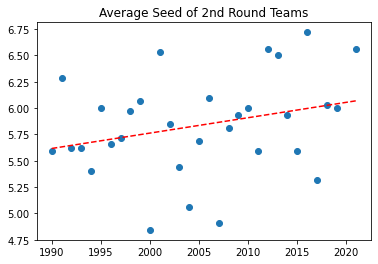

In [239]:
plt.scatter(stats.index, stats.avg_seed)

z = np.polyfit(stats.index, stats.avg_seed, 1)
p = np.poly1d(z)
plt.plot(stats.index,p(stats.index),"r--")
plt.title('Average Seed of 2nd Round Teams')
plt.show()

In [254]:
stats.sort_values(by='avg_seed',ascending=False).head()

,avg_seed
year,
2016,6.71875
2021,6.56250
2012,6.56250
2001,6.53125
2013,6.50000
